In [1]:
# external libraries
!pip install autograd
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr

import numpy
import math
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time


# our model libraries
from feed_forward import Feedforward
from nlm import NLM
from luna import LUNA

# our support libraries
import utils
import bayes_helpers as bh
from config import *

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# set optimization length to 3500 iterations to get a baseline working
opt_params['max_iteration'] = real_max_iteration

### Plotted the LUNA results on three datasets, all from different intervals of the data generating function.
### $y = x^3$
#### Gap Size 2: $x \in (-3, -1) \cup (1, 3)$
#### Gap Size 4: $x \in (-4, -2) \cup (2, 4)$
#### Gap Size 6: $x \in (-5, -3) \cup (3, 5)$

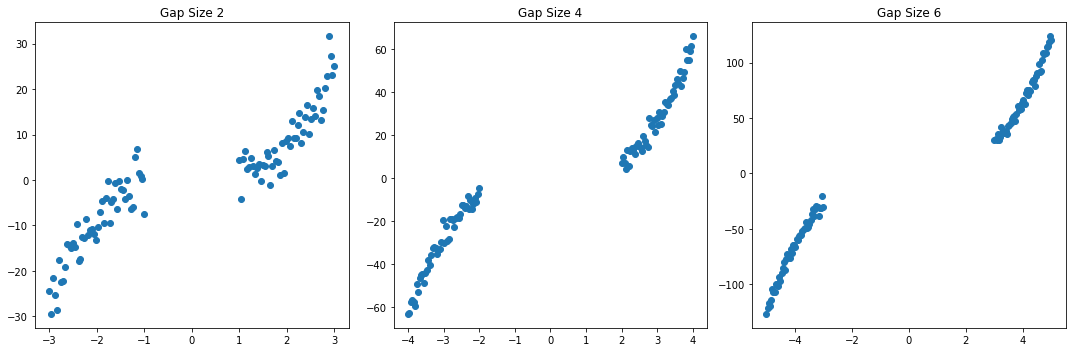

In [6]:
x_trains = {}
y_trains = {}
x_tests = {}

fig, ax = plt.subplots(1, 3, figsize = (15, 5))
for i, gap_size in enumerate([2, 4, 6]):
    x_train, y_train, x_test = utils.generate_data(training_seed, gap_size = gap_size)
    x_trains[gap_size] = x_train
    y_trains[gap_size] = y_train
    x_tests[gap_size] = x_test
    ax[i].scatter(x_train, y_train)
    ax[i].set_title(f'Gap Size {gap_size}')
plt.tight_layout()
plt.show()


In [ ]:
# Create LUNA object
luna = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, random_seed)


In [4]:
# Calculate LUNA's 95% posterior predictive interval for the three datasets

get_interval = lambda x : (np.percentile(x, 2.5, axis=0), np.mean(x, axis=0), np.percentile(x, 97.5, axis=0))
intervals = {}
for i, gap_size in enumerate([2, 4, 6]):
    t0 = time.time()
    x_train, y_train, x_test = x_trains[gap_size], y_trains[gap_size], x_tests[gap_size]
    luna.train(x_train, y_train, opt_params)
    print(f"Luna with gap size {gap_size}\ntime: {np.round(time.time() - t0, 3)} seconds")
    _, posterior_predictive_samples = luna.predict(x_test,prior = False)
    intervals[gap_size] = get_interval(posterior_predictive_samples)

 Iteration 3400 lower bound -5197.146534832051; gradient mag: 1433.0302184240402
Done Training
Luna with gap size 2
time: 4201.816 seconds
 Iteration 3400 lower bound -14427.701688459894; gradient mag: 116.29626139269459
Done Training
Luna with gap size 4
time: 4414.293 seconds
 Iteration 3400 lower bound -28417.950466653838; gradient mag: 589.8980420966353
Done Training
Luna with gap size 6
time: 4576.002 seconds


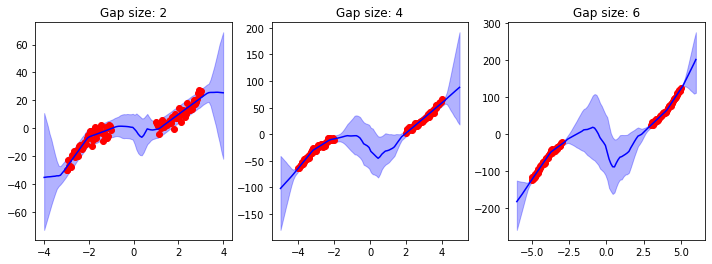

In [5]:
# Plot the posterior predictives

fig, ax = plt.subplots(1, 3, figsize = (12, 4))

for i, gap_size in enumerate([2, 4, 6]):
    x_train, y_train, x_test = x_trains[gap_size], y_trains[gap_size], x_tests[gap_size]
    lower, mean, upper = intervals[gap_size]
    ax[i].plot(x_test.flatten(), mean, color='blue', label = 'mean prediction') # visualize the mean of the posterior predictive
    ax[i].fill_between(x_test.flatten(), upper, lower, color='blue', alpha=0.3, label='95% Pred. Interval') # visualize the 95% posterior predictive interval
    ax[i].scatter(x_train, y_train, color='red', label='training data') # visualize the training data
    ax[i].set_title(f'Gap size: {gap_size}')

plt.show()
